# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association(like correlation between numerical variable) between two categorical variables. There are more columns for feature engineering but we'll focus on name column and filling missing values in other columns.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering. Task is predicting the survival of a passenger, but we will not build model in this homework.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode not having a cabin as character **O**

# Q1 (.5 points) fill NAN in cabin with Character 'O'

In [6]:
#Write code here
titanic_df['Cabin'] = titanic_df['Cabin'].replace(np.nan, 'O')

In [7]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter(C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
#Write code here

titanic_df['Cabin_type'] = titanic_df['Cabin'].astype(str).str[0]

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

<AxesSubplot:xlabel='Sex', ylabel='count'>

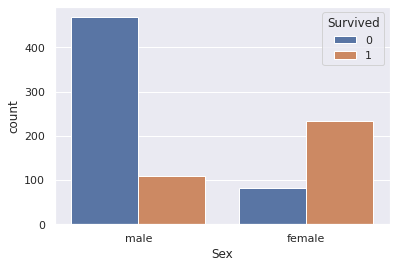

In [10]:
#Write code here

sns.countplot(x ='Sex', hue = "Survived", data = titanic_df)

# Q4(.5) What is your observation from this plot.

Write observation  here

Survived = (0 = no, 1 = yes)

Based on the graph, more women survived than men.

We can't use name as a feature for building any machine learning classifier(logistic regression). Let's look at Name columns and see if we can think of a better features for name.

In [11]:
titanic_df['Name'].sample(30)

93                               Dean, Mr. Bertram Frank
557                                  Robbins, Mr. Victor
178                                   Hale, Mr. Reginald
536                    Butt, Major. Archibald Willingham
327                              Ball, Mrs. (Ada E Hall)
352                                   Elias, Mr. Tannous
587                     Frolicher-Stehli, Mr. Maxmillian
843                           Lemberopolous, Mr. Peter L
640                               Jensen, Mr. Hans Peder
258                                     Ward, Miss. Anna
380                                Bidois, Miss. Rosalie
619                                  Gavey, Mr. Lawrence
509                                       Lang, Mr. Fang
403                       Hakkarainen, Mr. Pekka Pietari
160                             Cribb, Mr. John Hatfield
126                                  McMahon, Mr. Martin
184                  Kink-Heilmann, Miss. Luise Gretchen
613                            

# Q5.(.5 points) Can you suggest a feature based on *Name* columns 

Write 
your
suggestion
here

Salutation





# Q6(.5 points) Create a new feature named *Title* from the *Name* columns.

Hint: Here are different title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different title meant that time.

In [12]:
# Write code here

titanic_df['Title'] = [x.split(',')[1].replace(')', '') for x in titanic_df['Name']]
titanic_df['Title'] = titanic_df['Title'].str.split(n=1).str[0]
titanic_df['Title'].sample(30)

688        Mr.
697      Miss.
765       Mrs.
144        Mr.
130        Mr.
416       Mrs.
360        Mr.
612      Miss.
163        Mr.
520      Miss.
286        Mr.
28       Miss.
82       Miss.
401        Mr.
589        Mr.
260        Mr.
580      Miss.
754       Mrs.
692        Mr.
321        Mr.
345      Miss.
207        Mr.
811        Mr.
785        Mr.
800        Mr.
164    Master.
490        Mr.
128      Miss.
339        Mr.
259       Mrs.
Name: Title, dtype: object

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plot for male and female.

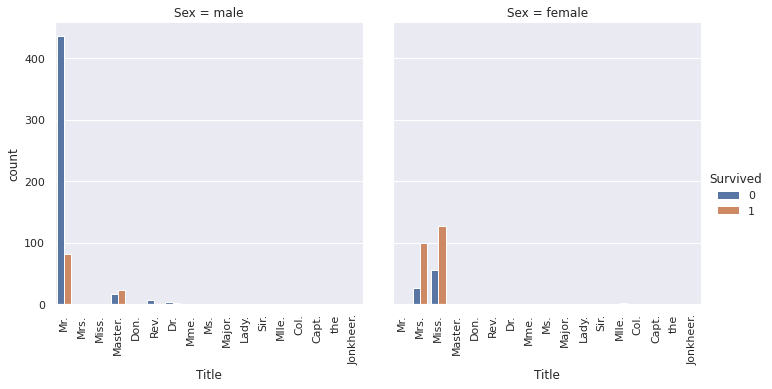

In [13]:
# Write code here

plot = sns.catplot(x ="Title", hue ="Survived", kind ="count",col ='Sex', data = titanic_df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plot

# Q 8(.5 points) What is your observation from these plots

Most of the men held the title Mr., and most died. Younger, unmarried women survived in greater quantities than women with the title Mrs. 

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age nan value by the mean for each **Title** group.

In [14]:
# Write code here

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby('Title')['Age'].transform('mean'))                           

In [15]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two record with missing Embarked value.

In [16]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [17]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [18]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [19]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

In [21]:
titanic_clean_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type,Title
0,0,3,1,22.0,1,0,7.2500,S,O,Mr.
1,1,1,0,38.0,1,0,71.2833,C,C,Mrs.
2,1,3,0,26.0,0,0,7.9250,S,O,Miss.
3,1,1,0,35.0,1,0,53.1000,S,C,Mrs.
4,0,3,1,35.0,0,0,8.0500,S,O,Mr.


# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [22]:
# Write code here

titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Title', 'Cabin_type'])

In [23]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt.,Title_Col.,...,Title_the,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title_Capt.          uint8
Title_Col.           uint8
Title_Don.           uint8
Title_Dr.            uint8
Title_Jonkheer.      uint8
Title_Lady.          uint8
Title_Major.         uint8
Title_Master.        uint8
Title_Miss.          uint8
Title_Mlle.          uint8
Title_Mme.           uint8
Title_Mr.            uint8
Title_Mrs.           uint8
Title_Ms.            uint8
Title_Rev.           uint8
Title_Sir.           uint8
Title_the            uint8
Cabin_type_A         uint8
Cabin_type_B         uint8
Cabin_type_C         uint8
Cabin_type_D         uint8
Cabin_type_E         uint8
Cabin_type_F         uint8
Cabin_type_G         uint8
Cabin_type_O         uint8
Cabin_type_T         uint8
dtype: object

# Q11.(.5) Plot headmap of correlation using titanic_df

<AxesSubplot:>

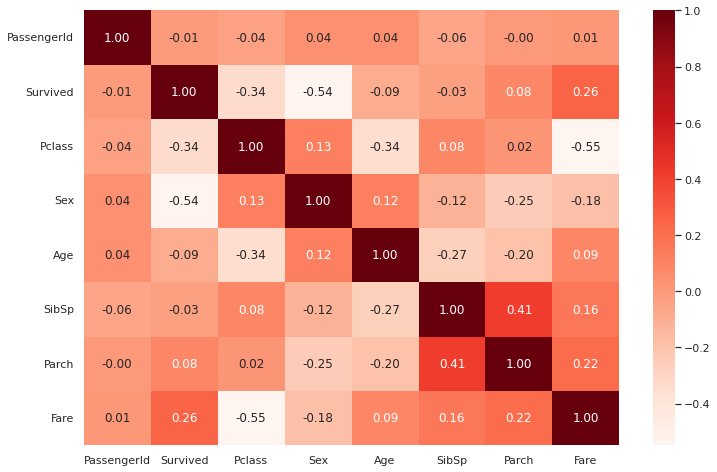

In [26]:
# Write code here

plt.figure(figsize=(12,8))
sns.heatmap(titanic_df.corr(), annot=True, fmt='.2f', cmap='Reds')

# Q 12.(.5) What are your observation from this heatmap.

The most strongly correlated columns are SibSp and Parch, The most negatively correlated columns are Pclass and Fare

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [27]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let's work with  titanic dataset again


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select record with Title value = *Master., Miss., Mr. or Mrs.*     into titanic_df_small.

You can check other title doesn't have enough record, hence ignoring them from our analysis.

In [28]:
# Write code here

titanic_df_small = titanic_df[np.isin(titanic_df, ['Master.', 'Miss.', 'Mr.', 'Mrs.']).any(axis=1)]

print(titanic_df_small.Title.unique())
titanic_df_small.head()

['Mr.' 'Mrs.' 'Miss.' 'Master.']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [29]:
# Write code here

survived_by_title = pd.crosstab(titanic_df_small.Survived, titanic_df_small.Title)
print(f'Cramers_v for association between Survived and Title: {cramers_v(survived_by_title.values)}')
survived_by_title

Cramers_v for association between Survived and Title: 0.56837187121439


Title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0,17,55,436,26
1,23,126,81,98


# Q 15(.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [31]:
# Write code here

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small.Title)

titanic_df_small.sample(5)


/tmp/ipykernel_512/3446811426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small.Title)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
529,530,0,2,"Hocking, Mr. Richard George",1,23.000000,2,1,29104,11.5000,O,S,O,Mr.,2
73,74,0,3,"Chronopoulos, Mr. Apostolos",1,26.000000,1,0,2680,14.4542,O,C,O,Mr.,2
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",0,21.000000,2,2,W./C. 6608,34.3750,O,S,O,Miss.,1
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,35.898148,1,0,17453,89.1042,C92,C,C,Mrs.,3
554,555,1,3,"Ohman, Miss. Velin",0,22.000000,0,0,347085,7.7750,O,S,O,Miss.,1


# Q 16(.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [32]:
# Write code here

corr = titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])
print(f'Correlation between Survived and Encoded_title: {round(corr, 3)}')

Correlation between Survived and Encoded_title: -0.073


# Q 17. (.5 points) Whats is your observation between using cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

The correlation coefficient shows a negative correlation between survived and encoded_title, however using cramer_v shows a pretty strong positive correlation.